## News dataset

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.9)  # Make sure everything is readable.
sns.set_style("whitegrid")

In [23]:
# import data
dir= '../../csv/news/'


mle_temp_lm_path  = dir+'best_mle_temp_lm_score.csv'
mle_temp_rlm_path = dir+'best_mle_temp_rlm_score.csv'

gan_temp_lm_path  = dir+'best_gan_temp_lm_score.csv'
gan_temp_rlm_path = dir+'best_gan_temp_rlm_score.csv'

cot_temp_lm_path  = dir+'best_cot_temp_lm_score.csv'
cot_temp_rlm_path = dir+'best_cot_temp_rlm_score.csv'

fmgan_temp_lm_path  = dir+'best_fmgan_temp_lm_score.csv'
fmgan_temp_rlm_path = dir+'best_fmgan_temp_rlm_score.csv'

fmgan_noise_lm_path  = dir+'best_fmgan_noise_lm_score.csv'
fmgan_noise_rlm_path = dir+'best_fmgan_noise_rlm_score.csv'



In [24]:
mle_lm = pd.read_csv(mle_temp_lm_path).drop_duplicates('Step')
mle_rlm = pd.read_csv(mle_temp_rlm_path).drop_duplicates('Step')

gan_lm = pd.read_csv(gan_temp_lm_path).drop_duplicates('Step')
gan_rlm = pd.read_csv(gan_temp_rlm_path).drop_duplicates('Step')

cot_lm = pd.read_csv(cot_temp_lm_path).drop_duplicates('Step')
cot_rlm = pd.read_csv(cot_temp_rlm_path).drop_duplicates('Step')

fmgan_temp_lm = pd.read_csv(fmgan_temp_lm_path).drop_duplicates('Step')
fmgan_temp_rlm = pd.read_csv(fmgan_temp_rlm_path).drop_duplicates('Step')

fmgan_noise_lm = pd.read_csv(fmgan_noise_lm_path).drop_duplicates('Step')
fmgan_noise_rlm = pd.read_csv(fmgan_noise_rlm_path).drop_duplicates('Step')



In [125]:
# fusion of fmgan results
fmgan_lm = pd.concat([fmgan_temp_lm, fmgan_noise_lm[:2]])
fmgan_rlm = pd.concat([fmgan_temp_rlm, fmgan_noise_rlm[:2]])



### show graphs

In [126]:
plt.rcParams['lines.markersize'] ** 2
size = 90.
bsize = 200
linewidth = 3

def get_size(pd_):
    size = [50] * len(pd_.Value)
    size[pd_[pd_.Step == 100].index[0]] = 200
    return size

def get_ec(c, pd_):
    ec  = [c] * len(pd_.Value)
    ec[pd_[pd_.Step == 100].index[0]] = 'k'
    return ec

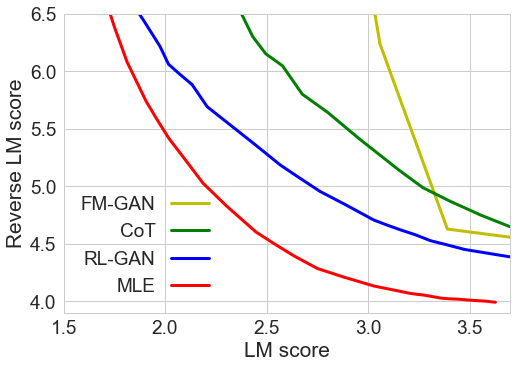

In [130]:

size_ = [size]*len(fmgan_lm.Value)
plt.plot(fmgan_lm.Value, \
         fmgan_rlm.Value, \
            c='y',
            label='FM-GAN',
            linewidth=linewidth)#edgecolor=get_ec('r', mle_rlm), linewidth=3)
size_ = [size]*len(cot_lm.Value)
plt.plot(cot_lm.Value, \
            cot_rlm.Value, \
            c='g',
            label='CoT',
            linewidth=linewidth)# edgecolor=get_ec('g', seqgan_lm_beta0_mti0_lm), linewidth=3)

size_ = [size]*len(gan_lm.Value)
plt.plot(gan_lm.Value, \
            gan_rlm.Value, \
            c='b',
            label='RL-GAN',
            linewidth=linewidth) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)


# size_ = [size]*len(fmgan_temp_lm.Value)
# plt.plot(fmgan_temp_lm.Value, \
#          fmgan_temp_rlm.Value, \
#             c='k',
#             label='FM-GAN (temp)',
#             linewidth=linewidth)#edgecolor=get_ec('r', mle_rlm), linewidth=3)

# size_ = [size]*len(fmgan_noise_lm.Value)
# plt.plot(fmgan_noise_lm.Value, \
#          fmgan_noise_rlm.Value, \
#             c='y',
#             label='FMGAN (noise)',
#             linewidth=linewidth)#edgecolor=get_ec('r', mle_rlm), linewidth=3)



size_ = [size]*len(mle_lm.Value)
plt.plot(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            linewidth=linewidth)#edgecolor=get_ec('r', mle_rlm), linewidth=3)



#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([1.5, 3.7, 3.9, 6.5])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
# plt.legend(frameon=False, markerfirst=False, loc=(0.5, 0.5))
plt.savefig('../../figs/news_lm_rlm.pdf', bbox_inches='tight')
plt.show()


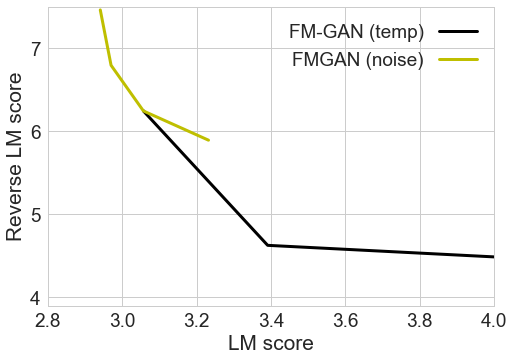

In [50]:


size_ = [size]*len(fmgan_temp_lm.Value)
plt.plot(fmgan_temp_lm.Value, \
         fmgan_temp_rlm.Value, \
            c='k',
            label='FM-GAN (temp)',
            linewidth=linewidth)#edgecolor=get_ec('r', mle_rlm), linewidth=3)

size_ = [size]*len(fmgan_noise_lm.Value)
plt.plot(fmgan_noise_lm.Value, \
         fmgan_noise_rlm.Value, \
            c='y',
            label='FMGAN (noise)',
            linewidth=linewidth)#edgecolor=get_ec('r', mle_rlm), linewidth=3)





#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([2.8, 4, 3.9, 7.5])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
# plt.legend(frameon=False, markerfirst=False, loc=(0.5, 0.5))
plt.savefig('../../figs/news_lm_rlm_fmgan.pdf', bbox_inches='tight')
plt.show()


In [6]:

# size_ = size
# size_[seqgan_mix_beta0_mti1_lm[seqgan_mix_beta0_mti1_lm.Step==100].index[0]] = bsize
# plt.scatter(seqgan_mix_beta0_mti1_lm.Value, \
#             seqgan_mix_beta0_mti1_rlm.Value, \
#             c='b',
#             label='GAN (quality+diversity)',
#             s=size_, edgecolor=get_ec('b', seqgan_mix_beta0_mti1_rlm), linewidth=3)

# size_ = size
# size_[stepgan_lm_beta0_mti1_lm[stepgan_lm_beta0_mti1_lm.Step==100].index[0]] = bsize
# plt.scatter(stepgan_lm_beta0_mti1_lm.Value, \
#             stepgan_lm_beta0_mti1_rlm.Value, \
#             c='g',
#             label='GAN (quality)',
#             s=size_, edgecolor=get_ec('g', stepgan_lm_beta0_mti1_rlm), linewidth=3)

# size_ = size
# size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
# plt.scatter(mle_lm.Value, \
#             mle_rlm.Value, \
#             c='r',
#             label='MLE',
#             s=size_, edgecolor=get_ec('r', mle_rlm), linewidth=3)

# #plt.colorbar(sc)
# plt.xlabel('LM score')
# plt.ylabel('Reverse LM score')
# plt.axis([1.8, 4.5, 4.7, 6.5])
# # plt.title('MLE (red) vs GAN (blue)')
# plt.legend(markerfirst=False)
# plt.savefig('../../figs/news_lm_rlm_temperature_mti1.pdf', bbox_inches='tight')
# plt.show()

In [7]:
# size_ = size
# size_[gan_lm_beta1_mti0_lm[gan_lm_beta1_mti0_lm.Step==100].index[0]] = bsize
# plt.scatter(gan_lm_beta1_mti0_lm.Value, \
#             gan_lm_beta1_mti0_rlm.Value, \
#             c='b',
#             label='GAN (quality+diversity)',
#             s=size_, edgecolor=get_ec('b', gan_lm_beta1_mti0_lm), linewidth=3)

# size_ = size
# size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
# plt.scatter(mle_lm.Value, \
#             mle_rlm.Value, \
#             c='r',
#             label='MLE',
#             s=size_, 
#             edgecolor=get_ec('r', mle_rlm), linewidth=3)
            



# #plt.colorbar(sc)
# plt.xlabel('LM score')
# plt.ylabel('Reverse LM score')
# plt.axis([1.8, 4.5, 4.7, 6.55])
# # plt.title('MLE (red) vs GAN (blue)')
# plt.legend(markerfirst=False, frameon=False)
# plt.savefig('../../figs/news_lm_rlm_temperature_beta1.png', bbox_inches='tight')
# plt.show()

### DECODERS COMPARASION

In [8]:
# import data
dir= '../../csv/news/'

mle_beam_lm_path  = dir+'best_mle_beam_lm_score.csv'
mle_beam_rlm_path = dir+'best_mle_beam_rlm_score.csv'

mle_temp_lm_path  = dir+'best_mle_temp_lm_score.csv'
mle_temp_rlm_path = dir+'best_mle_temp_rlm_score.csv'

mle_gen_ll_lm_path  = dir+'best_mle_gen_ll_lm_score.csv'
mle_gen_ll_rlm_path = dir+'best_mle_gen_ll_rlm_score.csv'

mle_disc_ll_lm_path  = dir+'best_mle_disc_ll_lm_score.csv'
mle_disc_ll_rlm_path = dir+'best_mle_disc_ll_rlm_score.csv'

mle_best_disc_ll_lm_path  = dir+'best_mle_best_disc_ll_lm_score.csv'
mle_best_disc_ll_rlm_path = dir+'best_mle_best_disc_ll_rlm_score.csv'

In [9]:
mle_beam_lm = pd.read_csv(mle_beam_lm_path).drop_duplicates('Step')
mle_beam_rlm = pd.read_csv(mle_beam_rlm_path).drop_duplicates('Step')

mle_temp_lm = pd.read_csv(mle_temp_lm_path).drop_duplicates('Step')
mle_temp_rlm = pd.read_csv(mle_temp_rlm_path).drop_duplicates('Step')

mle_gen_ll_lm = pd.read_csv(mle_gen_ll_lm_path).drop_duplicates('Step')
mle_gen_ll_rlm = pd.read_csv(mle_gen_ll_rlm_path).drop_duplicates('Step')

mle_disc_ll_lm = pd.read_csv(mle_disc_ll_lm_path).drop_duplicates('Step')
mle_disc_ll_rlm = pd.read_csv(mle_disc_ll_rlm_path).drop_duplicates('Step')

mle_best_disc_ll_lm = pd.read_csv(mle_best_disc_ll_lm_path).drop_duplicates('Step')
mle_best_disc_ll_rlm = pd.read_csv(mle_best_disc_ll_rlm_path).drop_duplicates('Step')

In [10]:
# graph of mle_best_disc is skecthy bc we computed to much datapoints

mle_best_disc_ll_lm = mle_best_disc_ll_lm[mle_best_disc_ll_lm.Step != 75.0]
mle_best_disc_ll_rlm = mle_best_disc_ll_rlm[mle_best_disc_ll_rlm.Step != 75.0]

mle_best_disc_ll_lm = mle_best_disc_ll_lm[mle_best_disc_ll_lm.Step != 81.0]
mle_best_disc_ll_rlm = mle_best_disc_ll_rlm[mle_best_disc_ll_rlm.Step != 81.0]

mle_best_disc_ll_lm = mle_best_disc_ll_lm[mle_best_disc_ll_lm.Step != 87.0]
mle_best_disc_ll_rlm = mle_best_disc_ll_rlm[mle_best_disc_ll_rlm.Step != 87.0]

mle_best_disc_ll_lm = mle_best_disc_ll_lm[mle_best_disc_ll_lm.Step != 91.0]
mle_best_disc_ll_rlm = mle_best_disc_ll_rlm[mle_best_disc_ll_rlm.Step != 91.0]

mle_best_disc_ll_lm = mle_best_disc_ll_lm[mle_best_disc_ll_lm.Step != 93.0]
mle_best_disc_ll_rlm = mle_best_disc_ll_rlm[mle_best_disc_ll_rlm.Step != 93.0]

mle_best_disc_ll_lm = mle_best_disc_ll_lm[mle_best_disc_ll_lm.Step != 95.0]
mle_best_disc_ll_rlm = mle_best_disc_ll_rlm[mle_best_disc_ll_rlm.Step != 95.0]


mle_best_disc_ll_rlm 

,Wall time,Step,Value
0,1.546522e+09,0.0,3.991417
1,4.775736e+07,12.5,3.990000
2,1.547757e+09,25.0,3.994151
3,1.547770e+09,50.0,3.990360
4,1.547784e+09,60.0,3.994475
5,1.547802e+09,70.0,3.992820
6,1.547731e+09,73.0,3.997302
8,1.547968e+09,79.0,4.006328
10,1.547981e+09,83.0,3.993224
11,1.547985e+09,85.0,4.019466


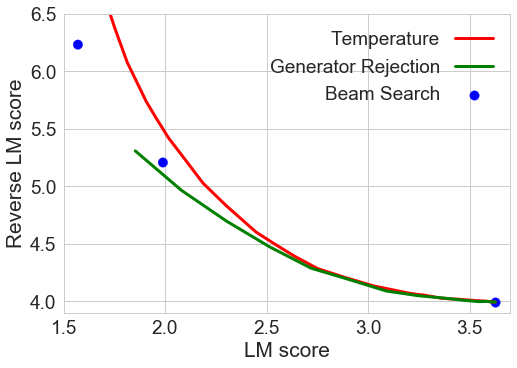

In [11]:
size_ = [size]*len(mle_beam_lm.Value)
# size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(mle_beam_lm.Value, \
            mle_beam_rlm.Value, \
            c='b',
            label='Beam Search',
            s=size_) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)

size_ = [size]*len(mle_temp_lm.Value)
# size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.plot(mle_temp_lm.Value, \
            mle_temp_rlm.Value, \
            c='r',
            label='Temperature',
            linewidth=linewidth)#s=size_) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)

size_ = [size]*len(mle_gen_ll_lm.Value)
# size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.plot(mle_gen_ll_lm.Value, \
            mle_gen_ll_rlm.Value, \
            c='g',
            label='Generator Rejection',
            linewidth=linewidth)#,s=size_) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)

# size_ = [size]*len(mle_disc_ll_lm.Value)
# # size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
# plt.plot(mle_disc_ll_lm.Value, \
#             mle_disc_ll_rlm.Value, \
#             c='k',
#             label='Discriminator Rejection',
#             linewidth=linewidth)#,s=size_) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)


#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([1.5, 3.7, 3.9, 6.5])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
plt.savefig('../../figs/news_lm_rlm_decoders.pdf', bbox_inches='tight')
plt.show()


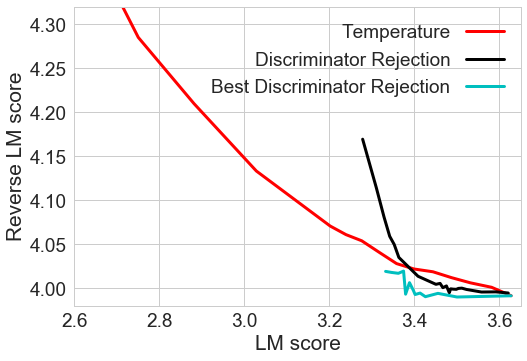

In [12]:
# size_ = [size]*len(mle_beam_lm.Value)
# # size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
# plt.scatter(mle_beam_lm.Value, \
#             mle_beam_rlm.Value, \
#             c='b',
#             label='beam',
#             s=size_) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)

size_ = [size]*len(mle_temp_lm.Value)
# size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.plot(mle_temp_lm.Value, \
            mle_temp_rlm.Value, \
            c='r',
            label='Temperature',
            linewidth=linewidth)#s=size_) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)

# size_ = [size]*len(mle_gen_ll_lm.Value)
# # size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
# plt.plot(mle_gen_ll_lm.Value, \
#             mle_gen_ll_rlm.Value, \
#             c='g',
#             label='Generator Rejection',
#             linewidth=linewidth)#,s=size_) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)

size_ = [size]*len(mle_disc_ll_lm.Value)
# size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.plot(mle_disc_ll_lm.Value, \
            mle_disc_ll_rlm.Value, \
            c='k',
            label='Discriminator Rejection',
            linewidth=linewidth)#,s=size_) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)

size_ = [size]*len(mle_best_disc_ll_lm.Value)
# size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.plot(mle_best_disc_ll_lm.Value, \
            mle_best_disc_ll_rlm.Value, \
            c='c',
            label='Best Discriminator Rejection',
            linewidth=linewidth)#,s=size_) #edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([2.6, 3.65, 3.98, 4.32])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
plt.savefig('../../figs/news_lm_rlm_decoders_zoom.pdf', bbox_inches='tight')
plt.show()

temp
gen_ll
beam


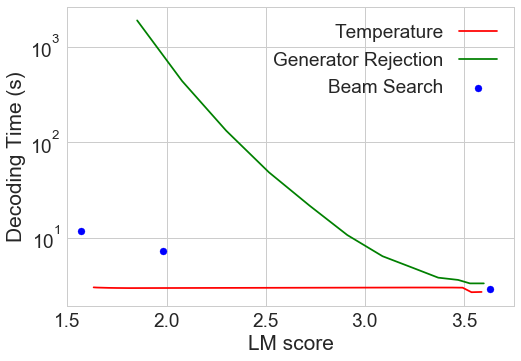

In [28]:
from os import listdir
from os.path import isfile, join

dir = '../../csv/decoding_time/'
onlyfiles = [f for f in listdir(dir) if isfile(join(dir, f))]

all_dicts = {}
temp, gen_ll, beam = {}, {}, {}
mapper = {'temp':temp, 'gen_ll':gen_ll, 'beam':beam}
title = {'temp':'Temperature', 'gen_ll':'Generator Rejection', 'beam':'Beam Search'}
color = {'temp':'red', 'gen_ll':'green', 'beam':'blue'}

for f in onlyfiles:
    if '.csv' in f:
        dd = {}
        lines = open(join(dir, f), 'r').read().splitlines()
        keys, valuess = lines[0], lines[1:]
        try:
            keys = keys.split(',')
        except:
            import pdb; pdb.set_trace()
            x=1
        for key in keys:
            dd[key] = []

        for values in valuess:
            try:values = map(float, values.split(','))
            except:
                import pdb; pdb.set_trace()
                x =1 
            for key, value in zip(keys, values):
                dd[key] += [value]

        all_dicts[f] = dd


for filename, dd in all_dicts.items():
    time = True if 'time' in filename else False
    if not time: 
        assert 'score' in filename, filename
    if time:
        id = filename.split('eval')[-1].split('time')[0][1:-1]
        mapper[id]['time'] = dd
    else:
        id = filename.split('eval')[-1].split('lm_score')[0][1:-1]
        mapper[id]['score'] = dd

final = {}
for dd in mapper:
    step = mapper[dd]['time']['Step']
    time = mapper[dd]['time']['Value']
    lm   = mapper[dd]['score']['Value']
    tt = list(zip(step, time, lm))
    tt.sort(key=lambda x : x[0])
    final[dd] = tt

import matplotlib.pyplot as plt

for method in ['temp', 'gen_ll', 'beam']:
    print(method)
    dd = final[method]
    start = 0 if 'll' in method else 0
    end = -6 if 'beam' in method else len(dd)
    ys = [x[1] for x in dd][start:end]
    xs = [y[2] for y in dd][start:end]
    mtd = plt.scatter if 'beam' in method else plt.plot
    mtd(xs, ys, label=title[method], color=color[method])

plt.ylabel('Decoding Time (s)')
plt.xlabel('LM score')
plt.legend(markerfirst=False, frameon=False)
plt.yscale('log')
plt.xlim(left=1.5)

plt.savefig('../../figs/decoding_time.pdf', bbox_inches='tight')
plt.show()


## COCO dataset

In [40]:
# import data
dir= '../../csv/coco/'

mle_lm_path  = dir+'run_best_mle_TB-tag-eval_lm_score.csv'
mle_rlm_path = dir+'run_best_mle_TB-tag-eval_rlm_score.csv'

gan_mix_beta0_mti0_lm_path  = dir+'run_gan_mix_beta0_mti0_TB-tag-eval_lm_score.csv'
gan_mix_beta0_mti0_rlm_path = dir+'run_gan_mix_beta0_mti0_TB-tag-eval_rlm_score.csv'

gan_lm_beta0_mti0_lm_path  = dir+'run_gan_lm_beta0_mti0_TB-tag-eval_lm_score.csv'
gan_lm_beta0_mti0_rlm_path = dir+'run_gan_lm_beta0_mti0_TB-tag-eval_rlm_score.csv'

gan_mix_beta0_mti1_lm_path  = dir+'run_gan_mix_beta0_mti1_TB-tag-eval_lm_score.csv'
gan_mix_beta0_mti1_rlm_path = dir+'run_gan_mix_beta0_mti1_TB-tag-eval_rlm_score.csv'

gan_lm_beta0_mti1_lm_path  = dir+'run_gan_lm_beta0_mti1_TB-tag-eval_lm_score.csv'
gan_lm_beta0_mti1_rlm_path = dir+'run_gan_lm_beta0_mti1_TB-tag-eval_rlm_score.csv'


gan_mix_beta1_mti0_lm_path  = dir+'run_gan_mix_beta1_mti0_TB-tag-eval_lm_score.csv'
gan_mix_beta1_mti0_rlm_path = dir+'run_gan_mix_beta1_mti0_TB-tag-eval_rlm_score.csv'

gan_lm_beta1_mti0_lm_path  = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_lm_score.csv'
gan_lm_beta1_mti0_rlm_path = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_rlm_score.csv'




In [41]:
mle_lm = pd.read_csv(mle_lm_path).drop_duplicates('Step')
mle_rlm = pd.read_csv(mle_rlm_path).drop_duplicates('Step')

gan_mix_beta0_mti0_lm  = pd.read_csv(gan_mix_beta0_mti0_lm_path).drop_duplicates('Step')
gan_mix_beta0_mti0_rlm = pd.read_csv(gan_mix_beta0_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_lm_beta0_mti0_lm  = pd.read_csv(gan_lm_beta0_mti0_lm_path).drop_duplicates('Step')
gan_lm_beta0_mti0_rlm = pd.read_csv(gan_lm_beta0_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')

# gan_mix_beta0_mti1_lm  = pd.read_csv(gan_mix_beta0_mti1_lm_path).drop_duplicates('Step')
# gan_mix_beta0_mti1_rlm = pd.read_csv(gan_mix_beta0_mti1_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_lm_beta0_mti1_lm  = pd.read_csv(gan_lm_beta0_mti1_lm_path).drop_duplicates('Step')
gan_lm_beta0_mti1_rlm = pd.read_csv(gan_lm_beta0_mti1_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_mix_beta1_mti0_lm  = pd.read_csv(gan_mix_beta1_mti0_lm_path).drop_duplicates('Step')
gan_mix_beta1_mti0_rlm = pd.read_csv(gan_mix_beta1_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_lm_beta1_mti0_lm  = pd.read_csv(gan_lm_beta1_mti0_lm_path).drop_duplicates('Step')
gan_lm_beta1_mti0_rlm = pd.read_csv(gan_lm_beta1_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')


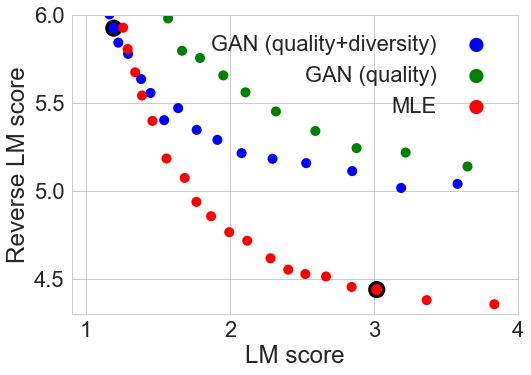

In [43]:
size_ = [50]*len(gan_mix_beta0_mti0_lm)
size_[gan_mix_beta0_mti0_lm[gan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(gan_mix_beta0_mti0_lm.Value, \
            gan_mix_beta0_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)',
            s=size_, 
            edgecolor=get_ec('b', gan_mix_beta0_mti0_rlm), linewidth=3)

size_ = [50]*len(gan_lm_beta0_mti0_lm)
size_[gan_lm_beta0_mti0_lm[gan_lm_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(gan_lm_beta0_mti0_lm.Value, \
            gan_lm_beta0_mti0_rlm.Value, \
            c='g',
            label='GAN (quality)',
            s=size_, 
            edgecolor=get_ec('g', gan_lm_beta0_mti0_rlm), linewidth=3)

size_ = [50]*len(mle_lm)
size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            s=size_, 
            edgecolor=get_ec('r', mle_lm), linewidth=3)


#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([0.9, 4, 4.3, 6])
# plt.title('MLE (red) vs GAN (blue)')

plt.legend(markerfirst=False, frameon=False)
plt.savefig('figs/coco_lm_rlm_temperature_mti0.pdf', bbox_inches='tight')
plt.show()

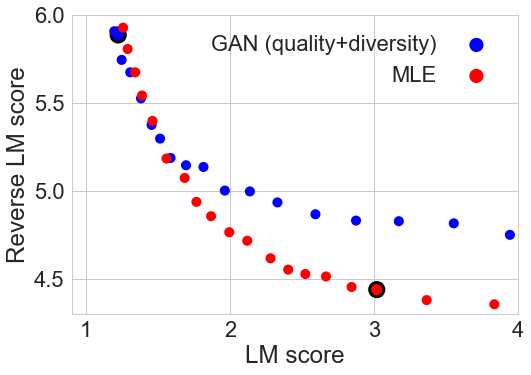

In [48]:
size_ = [50]*len(gan_lm_beta0_mti1_lm)
size_[gan_lm_beta0_mti1_lm[gan_lm_beta0_mti1_lm.Step==100].index[0]] = bsize
plt.scatter(gan_lm_beta0_mti1_lm.Value, \
            gan_lm_beta0_mti1_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)',
            s=size_, 
            edgecolor=get_ec('b', gan_lm_beta0_mti1_rlm), linewidth=3)

size_ = [50]*len(mle_lm)
size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            s=size_, 
            edgecolor=get_ec('r', mle_lm), linewidth=3)




# plt.scatter(gan_lm_beta0_mti1_lm.Value, \
#             gan_lm_beta0_mti1_rlm.Value, \
#             c='g',
#             label='GAN (quality)')

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([0.9, 4., 4.3, 6])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
plt.savefig('../../figs/coco_lm_rlm_temperature_mti1.pdf', bbox_inches='tight')
plt.show()

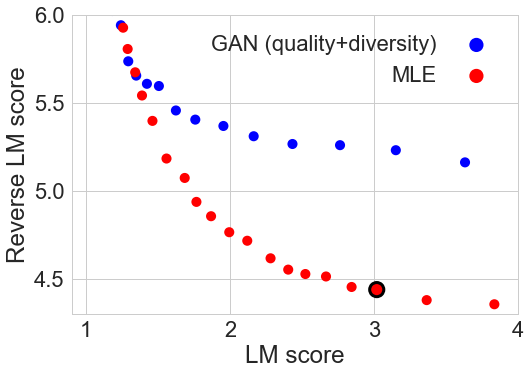

In [49]:
size_ = [50]*len(gan_lm_beta1_mti0_lm)
size_[gan_lm_beta1_mti0_lm[gan_lm_beta1_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(gan_mix_beta1_mti0_lm.Value, \
            gan_mix_beta1_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)',
            s=size_, 
            edgecolor=get_ec('b', gan_mix_beta1_mti0_lm), linewidth=3)

size_ = [50]*len(mle_lm)
size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            s=size_, 
            edgecolor=get_ec('r', mle_lm), linewidth=3)

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([0.9, 4., 4.3, 6])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
plt.savefig('../../figs/coco_lm_rlm_temperature_beta1.pdf' , bbox_inches='tight')
plt.show()

## argument for quality/diversity w.r.t temperatures 

In [51]:
model1_lm = mle_lm.Value[:-2]
model1_rlm = mle_rlm.Value[:-2]

model2_lm = model1_lm
model2_rlm = model1_rlm

model2_lm = [ x-0.6 for x in model2_lm ]
model1_rlm = [ x-0.6 for x in model1_rlm ]

model3_lm = model1_lm
model3_rlm = model1_rlm

model4_lm  = model2_lm
model4_rlm = model2_rlm



In [ ]:
size=100

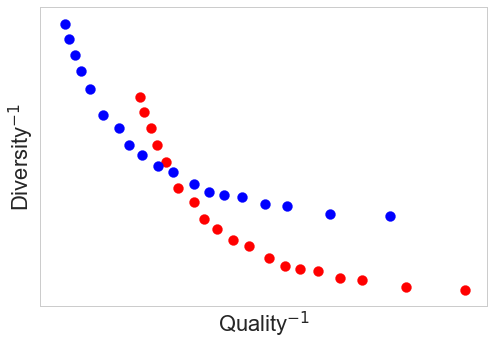

In [60]:
plt.scatter(model1_lm,
            model1_rlm, 
            c='r',
            alpha=1,
            s=size)

plt.scatter(model2_lm, 
            model2_rlm,
            c='b',
            alpha=1,
            s=size)



#plt.colorbar(sc)
plt.xlabel(r'Quality$^{-1}$')
plt.ylabel(r'Diversity$^{-1}$')
plt.xticks([])
plt.yticks([])

plt.savefig('../../figs/good_eval.pdf', bbox_inches='tight')
plt.show()

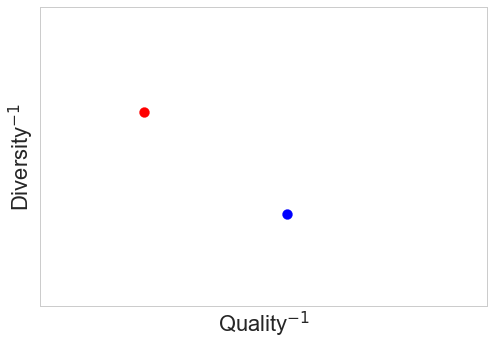

In [61]:
plt.scatter(model1_lm,
            model1_rlm, 
            c='r',
            alpha=0,
            s=size)

lenght = len(model1_lm)
plt.scatter(model1_lm[lenght-2], 
            model1_rlm[lenght-2], 
            c='r',
            alpha=1,
            s=size)

plt.scatter(model2_lm, 
            model2_rlm,
            c='b',
            alpha=0,
            s=size)

plt.scatter(model2_lm[2], 
            model2_rlm[2], 
            c='b',
            alpha=1,
            s=size)


#plt.colorbar(sc)
plt.xlabel(r'Quality$^{-1}$')
plt.ylabel(r'Diversity$^{-1}$')
plt.xticks([])
plt.yticks([])


plt.savefig('../../figs/bad_eval.pdf', bbox_inches='tight')
plt.show()

In [62]:
# model2_lm = [ x-0.6 for x in model2_lm ]
# model1_rlm = [ x-0.6 for x in model1_rlm ]

model3_lm = model1_lm
model3_rlm = model1_rlm

model4_lm  = model2_lm
model4_rlm = model2_rlm

model3_rlm = [ x+0.8 for x in model3_rlm ]
model3_lm = [ x-0.3 for x in model3_lm ]

model4_rlm = [ x+0. for x in model4_rlm ]
model4_lm = [ x+0.1 for x in model4_lm ]

# model1_rlm = [ x-0.6 for x in model1_rlm ]


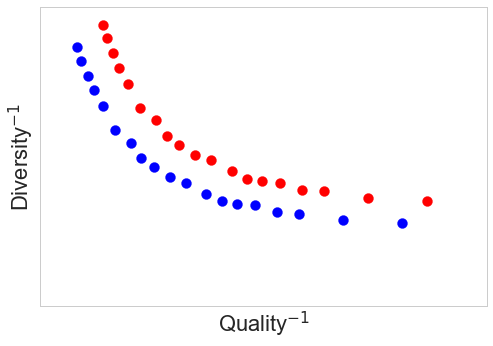

In [63]:
plt.scatter(model1_lm,
            model1_rlm, 
            c='r',
            alpha=0,
            s=size)

plt.scatter(model2_lm, 
            model2_rlm,
            c='b',
            alpha=0,
            s=size)


plt.scatter(model3_lm,
            model3_rlm, 
            c='r',
            alpha=1,
            s=size)

plt.scatter(model4_lm, 
            model4_rlm,
            c='b',
            alpha=1,
            s=size)



#plt.colorbar(sc)
plt.xlabel(r'Quality$^{-1}$')
plt.ylabel(r'Diversity$^{-1}$')
plt.xticks([])
plt.yticks([])

plt.savefig('../../figs/gooder_eval.pdf', bbox_inches='tight')
plt.show()